In [107]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
iris_df=pd.read_excel("Z:\FA1\DataSets\Iris data.xls")
iris_df.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
iris            150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [35]:
iris_df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
iris_df.median()

sepal length    5.80
sepal width     3.00
petal length    4.35
petal width     1.30
dtype: float64

In [37]:
iris_df.mode()

,sepal length,sepal width,petal length,petal width,iris
0,5.0,3.0,1.5,0.2,Iris-setosa
1,NaN,NaN,NaN,NaN,Iris-versicolor
2,NaN,NaN,NaN,NaN,Iris-virginica


In [38]:
from scipy.stats import kurtosis
from scipy.stats import skew
iris_df.skew()
# if it is negative then it is left skewed 
# if it is positive then it is right skewed

sepal length    0.314911
sepal width     0.334053
petal length   -0.274464
petal width    -0.104997
dtype: float64

In [39]:
iris_df.kurtosis()

sepal length   -0.552064
sepal width     0.290781
petal length   -1.401921
petal width    -1.339754
dtype: float64

In [40]:
iris_df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
iris            0
dtype: int64

In [41]:
a=iris_df["iris"].value_counts()
a


Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: iris, dtype: int64

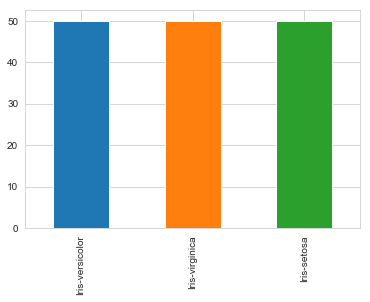

In [42]:
a.plot(kind="bar")

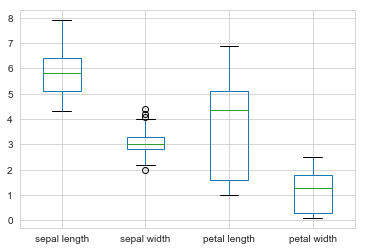

In [43]:
iris_df.plot(kind="box")

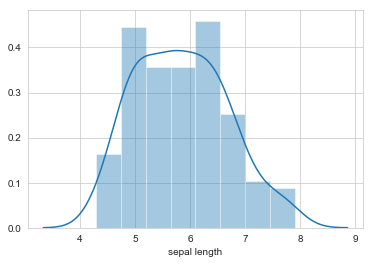

In [99]:
sb.distplot(iris_df["sepal length"])

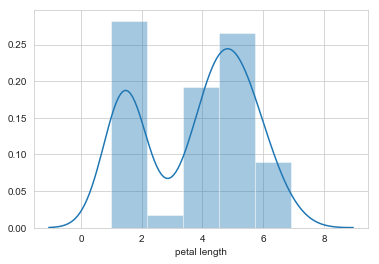

In [101]:
sb.distplot(iris_df["petal length"])

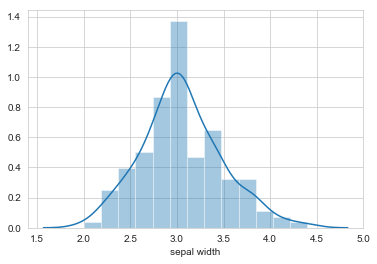

In [102]:
sb.distplot(iris_df["sepal width"])

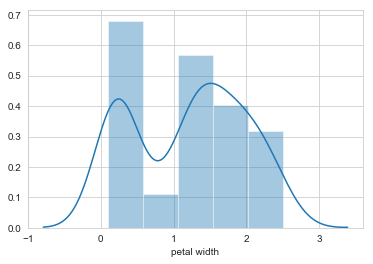

In [103]:
sb.distplot(iris_df["petal width"])

In [44]:
#distribution 
# sepal width is normally distributed other variables are not normally distributed

from scipy.stats import shapiro
display(shapiro(iris_df["sepal length"]))
display(shapiro(iris_df["sepal width"]))
display(shapiro(iris_df["petal width"]))
display(shapiro(iris_df["petal length"]))

(0.9760899543762207, 0.010180278681218624)

(0.9837920665740967, 0.07518772780895233)

(0.902624249458313, 1.864667886763982e-08)

(0.8764243125915527, 7.54509399403247e-10)

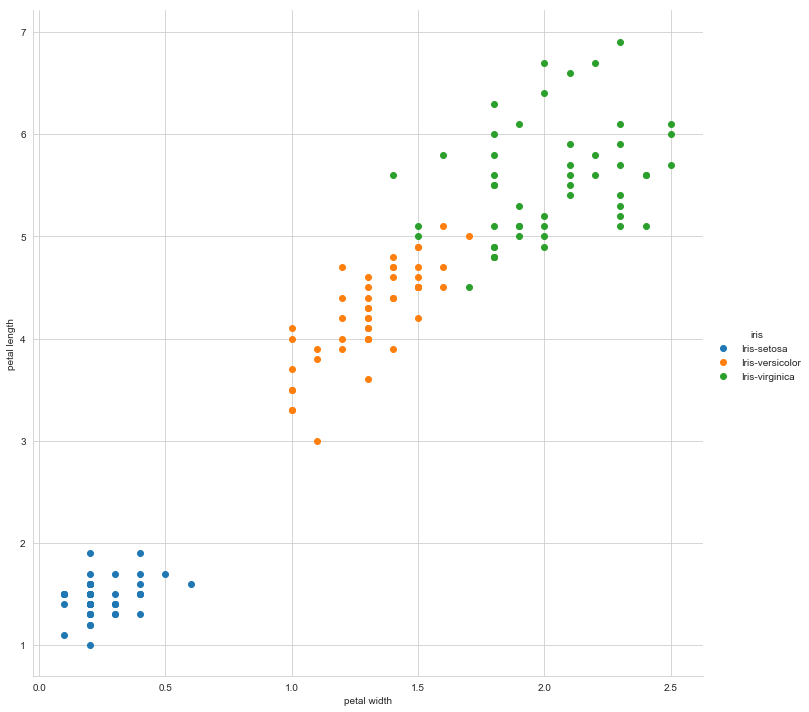

In [111]:
sb.set_style("whitegrid")
sb.FacetGrid(iris_df,hue="iris",size=10).map(plt.scatter,"petal width","petal length").add_legend()
plt.show()

# from this we can say that if petal width is lesser than 0.7 and petal length is lesser than petal length then it is iris setosa
# if petal width is from 1.0 to 1.6 and petal length from 3 to 5 then it is iris versicolor
# if petal width is above 1.6 and petal length above 5 then it is iris virginica

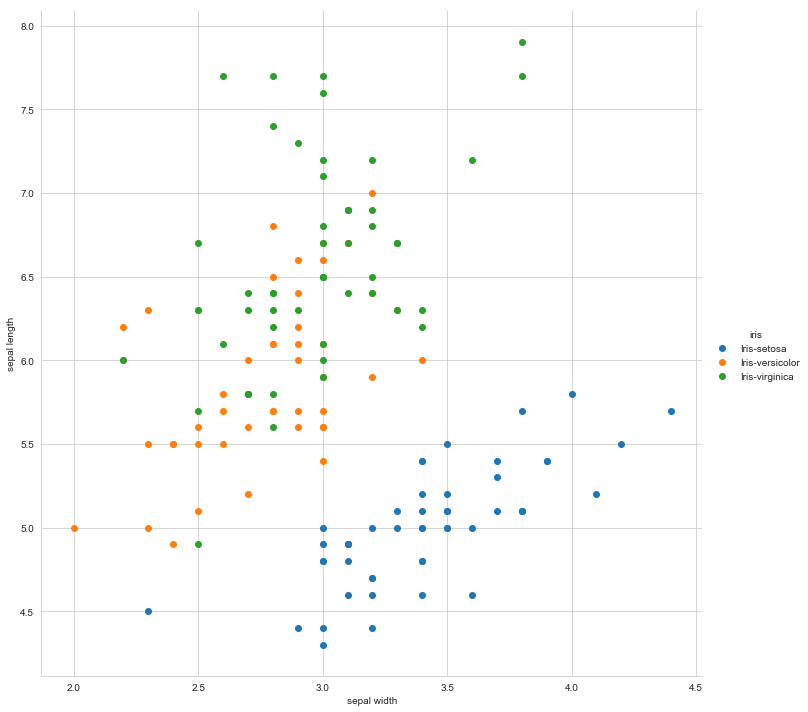

In [46]:
sb.set_style("whitegrid")
sb.FacetGrid(iris_df,hue="iris",size=10).map(plt.scatter,"sepal width","sepal length").add_legend()
plt.show() 


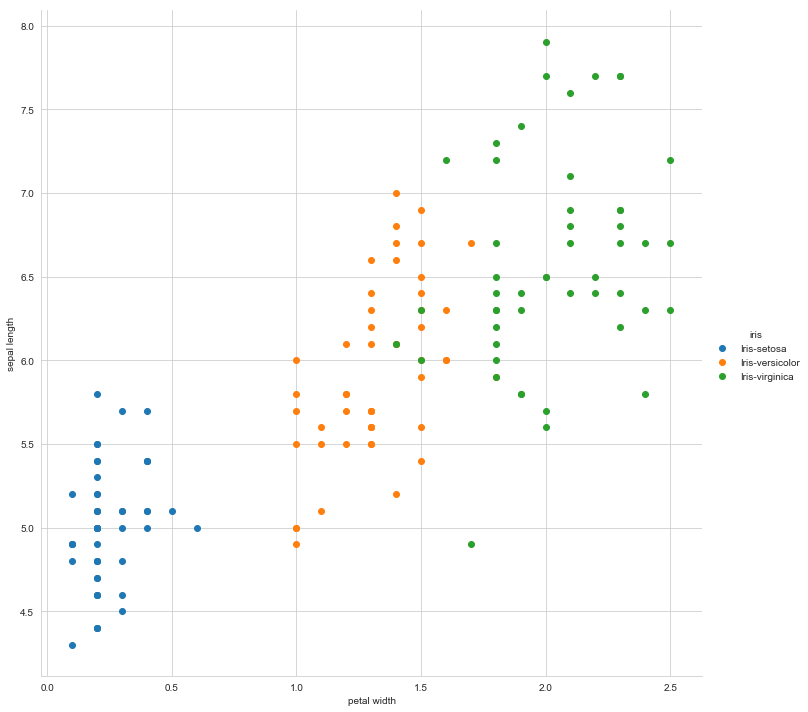

In [47]:
# if sepal length less  than 5.7 and petal width less than 0.7 it is iris setosa
#  if sepal length less  than 5.7 and petal width less than 0.7 it is iris versicolor

sb.set_style("whitegrid")
sb.FacetGrid(iris_df,hue="iris",size=10).map(plt.scatter,"petal width","sepal length").add_legend()
plt.show() 


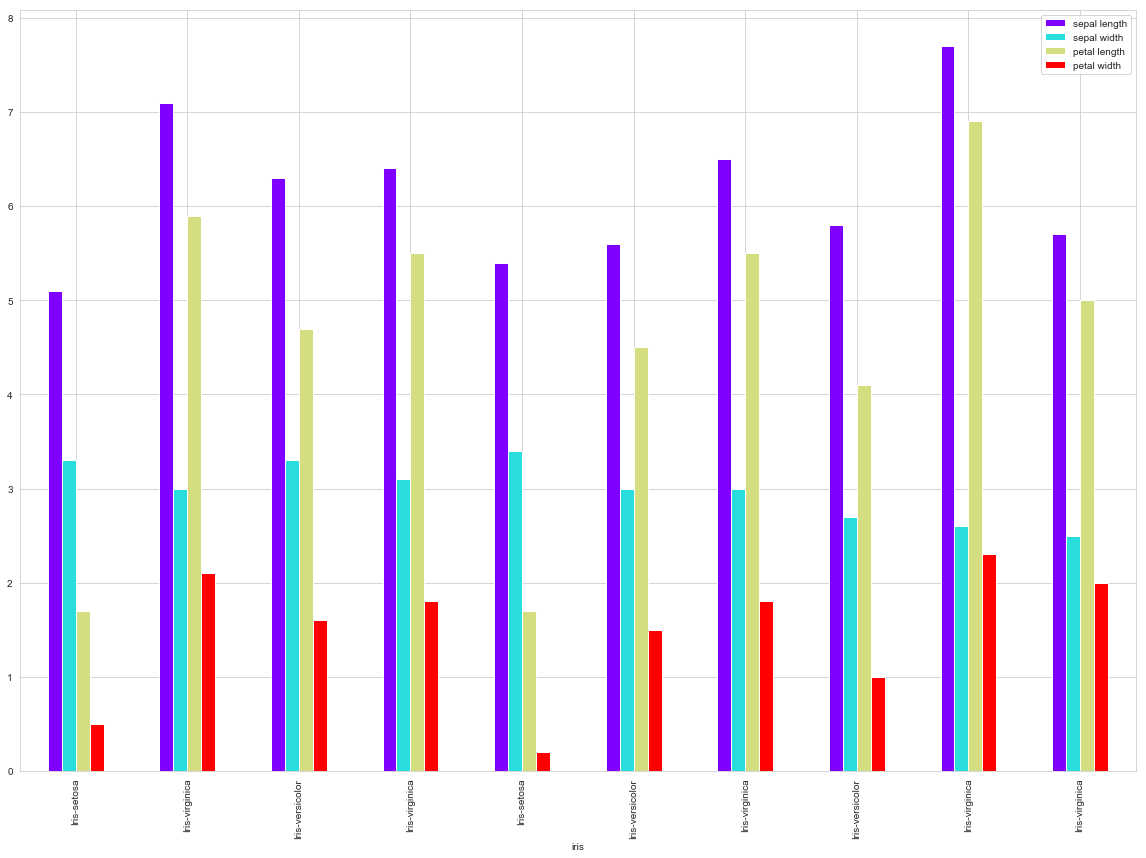

In [105]:

import matplotlib.cm as cm
iris_df.sample(10).plot(x="iris",kind="bar",stacked=False,colormap=cm.rainbow,figsize=(20,14))


In [49]:
#distribution 
# sepal width is normally distributed other variables are not normally distributed

from scipy.stats import shapiro
display(shapiro(iris_df["sepal length"]))
display(shapiro(iris_df["sepal width"]))
display(shapiro(iris_df["petal width"]))
display(shapiro(iris_df["petal length"]))

(0.9760899543762207, 0.010180278681218624)

(0.9837920665740967, 0.07518772780895233)

(0.902624249458313, 1.864667886763982e-08)

(0.8764243125915527, 7.54509399403247e-10)

In [50]:
#6 finding corelation between the variables 
#since it is not normally distributed we use spearman

iris_df.corr(method="spearman")

#petal width and petal height, petal length amd sepal length are highly correlated 
#petal length and sepal width , petal width and sepal width are weekly correlated
# sepal width and sepal legth is not correlated

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.159457,0.881386,0.834421
sepal width,-0.159457,1.000000,-0.303421,-0.277511
petal length,0.881386,-0.303421,1.000000,0.936003
petal width,0.834421,-0.277511,0.936003,1.000000


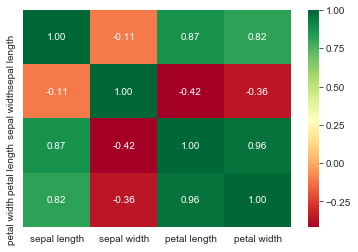

In [51]:
sb.heatmap(iris_df.corr(),annot=True,fmt=".2f",cmap="RdYlGn")

In [52]:
#5 feature to feature relationship
#sepal width and sepal legth ,sepal width and petal legth ,sepal legth and petal width are negative association 
# so they all are inversely proportional

# sepal length and petal length , sepal length and petal width ,petal length and petal width are positive association 
# so it is directly proportional and if one increases other also increases
iris_df.cov()

,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


In [53]:
#4 probability
from scipy.special import comb
display((comb(50,1))**3/(comb(150,3)))

0.22673680391801196

In [54]:
#copying the dataframe 

dataset2=iris_df

In [92]:
# label encoding is done for categorical column iris

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label=le.fit_transform(dataset2["iris"])
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [56]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [57]:
#dropped the iris column 
dataset2=dataset2.drop("iris",axis=1)
dataset2.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [91]:
# appended label encoded value
dataset2["iris"]=label
dataset2.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [93]:
# scaling is done 

from sklearn import preprocessing 
scaler=preprocessing.MinMaxScaler()
dataset3= pd.DataFrame(scaler.fit_transform(dataset2))
dataset3.columns=["sepal length","sepal width","petal length","petal width","iris"]
dataset3.head()

,sepal length,sepal width,petal length,petal width,iris
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


In [73]:
dataset3.describe()

,sepal length,sepal width,petal length,petal width,iris
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778,0.500000
std,0.230018,0.180664,0.299054,0.317984,0.409616
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,0.500000
75%,0.583333,0.541667,0.694915,0.708333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
dataset3.median()

sepal length    0.416667
sepal width     0.416667
petal length    0.567797
petal width     0.500000
iris            0.500000
dtype: float64

In [75]:
dataset3.mode()

,sepal length,sepal width,petal length,petal width,iris
0,0.194444,0.416667,0.084746,0.041667,0.0
1,NaN,NaN,NaN,NaN,0.5
2,NaN,NaN,NaN,NaN,1.0


In [76]:
from scipy.stats import kurtosis
from scipy.stats import skew
dataset3.skew()
# if it is negative then it is left skewed 
# if it is positive then it is right skewed

sepal length    0.314911
sepal width     0.334053
petal length   -0.274464
petal width    -0.104997
iris            0.000000
dtype: float64

In [77]:
dataset3.kurtosis()

sepal length   -0.552064
sepal width     0.290781
petal length   -1.401921
petal width    -1.339754
iris           -1.510135
dtype: float64

In [78]:
dataset3.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
iris            0
dtype: int64

In [79]:
b=dataset3["iris"].value_counts()
b

1.0    50
0.5    50
0.0    50
Name: iris, dtype: int64

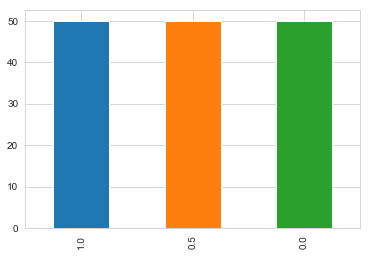

In [80]:
b.plot(kind="bar")

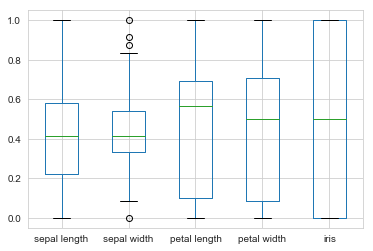

In [81]:
dataset3.plot(kind="box")

In [82]:

from scipy.stats import shapiro
display(shapiro(dataset3["sepal length"]))
display(shapiro(dataset3["sepal width"]))
display(shapiro(dataset3["petal width"]))
display(shapiro(dataset3["petal length"]))

(0.9760904312133789, 0.010181537829339504)

(0.9837924838066101, 0.07519631832838058)

(0.9026241302490234, 1.8646375110620284e-08)

(0.8764241933822632, 7.544982416618495e-10)

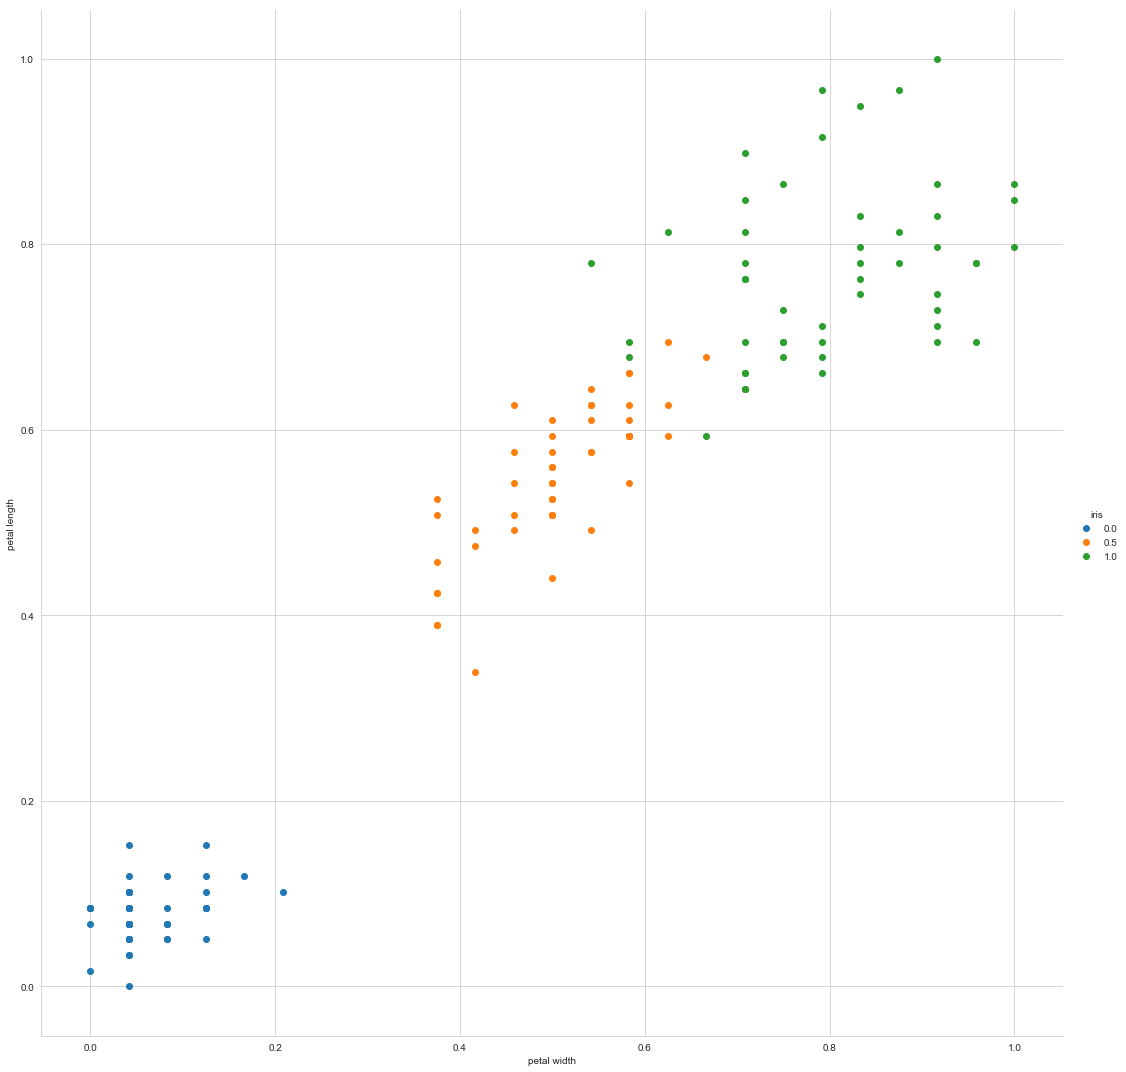

In [95]:
sb.set_style("whitegrid")
sb.FacetGrid(dataset3,hue="iris",size=15).map(plt.scatter,"petal width","petal length").add_legend()
plt.show()


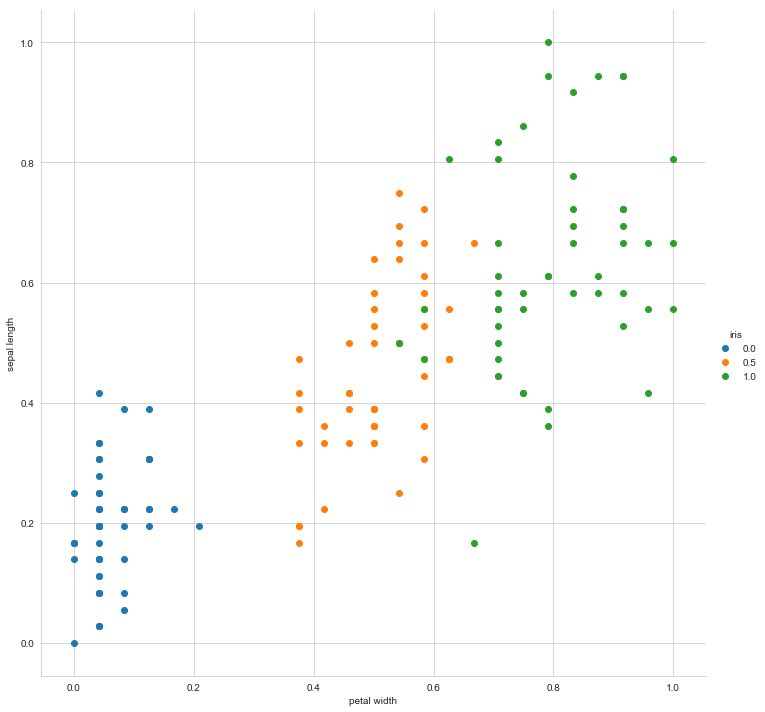

In [85]:
sb.set_style("whitegrid")
sb.FacetGrid(dataset3,hue="iris",size=10).map(plt.scatter,"petal width","sepal length").add_legend()
plt.show() 

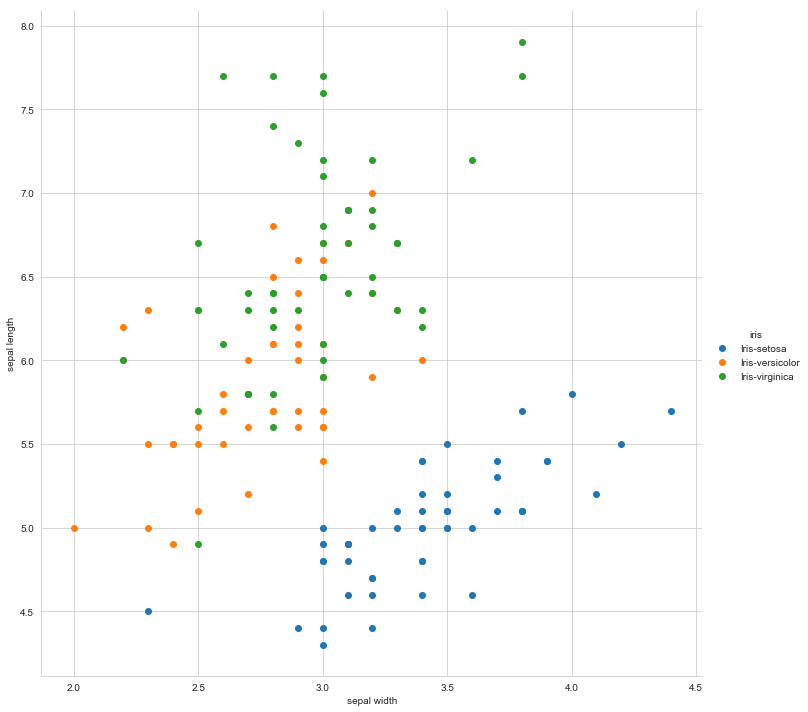

In [86]:
sb.set_style("whitegrid")
sb.FacetGrid(iris_df,hue="iris",size=10).map(plt.scatter,"sepal width","sepal length").add_legend()
plt.show() 


In [87]:
#distribution 
# sepal width is normally distributed other variables are not normally distributed

from scipy.stats import shapiro
display(shapiro(iris_df["sepal length"]))
display(shapiro(iris_df["sepal width"]))
display(shapiro(iris_df["petal width"]))
display(shapiro(iris_df["petal length"]))

(0.9760899543762207, 0.010180278681218624)

(0.9837920665740967, 0.07518772780895233)

(0.902624249458313, 1.864667886763982e-08)

(0.8764243125915527, 7.54509399403247e-10)

In [88]:
#6 finding corelation between the variables 
#since it is not normally distributed we use spearman

iris_df.corr(method="spearman")



,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.159457,0.881386,0.834421
sepal width,-0.159457,1.000000,-0.303421,-0.277511
petal length,0.881386,-0.303421,1.000000,0.936003
petal width,0.834421,-0.277511,0.936003,1.000000


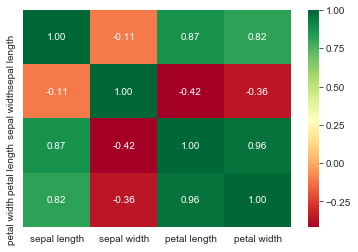

In [89]:
sb.heatmap(iris_df.corr(),annot=True,fmt=".2f",cmap="RdYlGn")

In [90]:
iris_df.cov()

,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


In [108]:
comb(167,5)/comb(583,5)

0.0018469950297713782